In [1]:
from db_utils import query_hive_ssh, execute_hive_expression, get_hive_timespan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
% matplotlib inline
import shutil
import os
import numpy as np

In [9]:

query = """
SELECT
concat(month,'-',day,'-',year) AS date,
page_title,
SUM(IF (country = 'Turkey', view_count, null)) AS count,
100*SUM(IF (country = 'Turkey', view_count, null))/SUM(view_count) AS proportion
FROM wmf.pageview_hourly
WHERE year = 2015
AND month in (5, 6, 7)
AND agent_type = 'user'
AND project = 'tr.wikipedia'
AND page_title in ('İnsan_penisi', 'Kadın_üreme_organları', 'Testis_torbası',  'Vajina',  '2015_Türkiye_genel_seçimleri_anketleri', '2015_Türkiye_genel_seçim_anketleri')
GROUP BY year, month, day, page_title;
"""

d = query_hive_ssh(query, 'turkey_query.tsv', delete = False, priority = True)

In [10]:
d.head()

,date,page_title,count,proportion
0,5-3-2015,İnsan_penisi,680,75.471698
1,5-24-2015,İnsan_penisi,635,75.775656
2,6-14-2015,İnsan_penisi,572,65.898618
3,7-4-2015,İnsan_penisi,2550,89.536517
4,7-25-2015,İnsan_penisi,1232,88.442211


In [16]:
d.index = pd.to_datetime(d['date'])

In [14]:
pages = ['İnsan_penisi', 'Kadın_üreme_organları', 'Testis_torbası',  'Vajina',  '2015_Türkiye_genel_seçimleri_anketleri', '2015_Türkiye_genel_seçim_anketleri']

In [29]:
def plot_page(d, page, proportion):
    print(page)
    if proportion:
        d[d['page_title'] == page]['proportion'].plot()
    else:
        d[d['page_title'] == page]['count'].plot()

İnsan_penisi


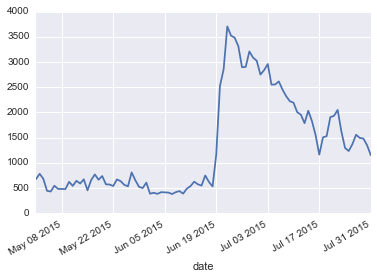

In [30]:
plot_page(d, pages[0], False)

İnsan_penisi


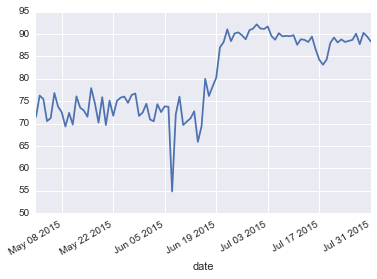

In [31]:
plot_page(d, pages[0], True)

Kadın_üreme_organları


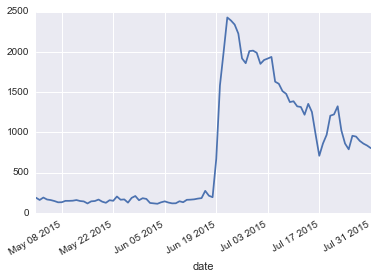

In [32]:
plot_page(d, pages[1], False)

Kadın_üreme_organları


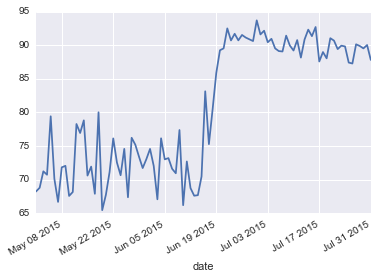

In [33]:
plot_page(d, pages[1], True)

Testis_torbası


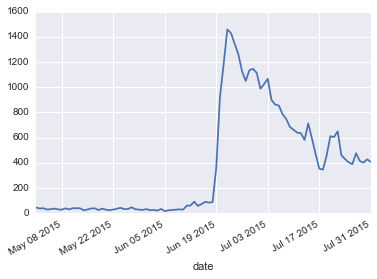

In [36]:
plot_page(d, pages[2], False)

Testis_torbası


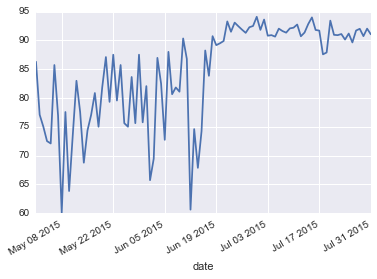

In [37]:
plot_page(d, pages[2], True)

Vajina


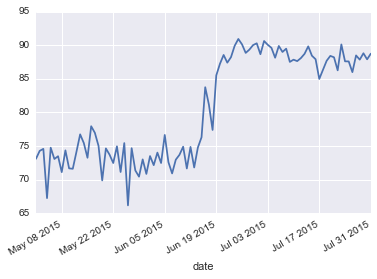

In [39]:
plot_page(d, pages[3], True)